<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


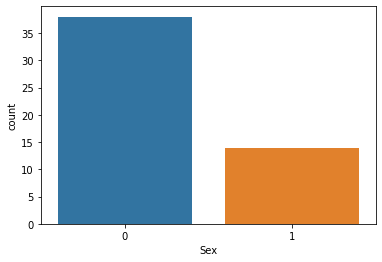

In [ ]:
sns.countplot(df["Sex"])

In [ ]:
avg_female_sal=df[df["Sex"]==1]["Salary"].mean()
avg_female_sal


21357.14285714286

In [ ]:
avg_male_sal=df[df["Sex"]==0]["Salary"].mean()
avg_male_sal

24696.78947368421

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


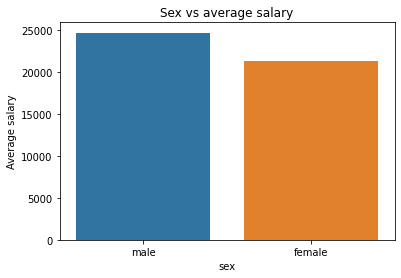

In [ ]:
sex=["male","female"]
avg_salary=[avg_male_sal,avg_female_sal]
plt.xlabel("sex")
plt.ylabel("Average salary")
plt.title("Sex vs average salary")
sns.barplot(sex,avg_salary)

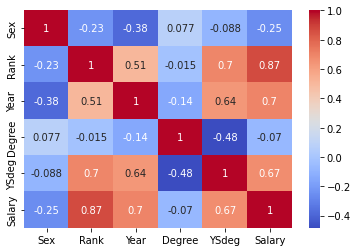

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [ ]:
col=[i for i in df.columns]
col

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary']

1)Find the linear regression equation for this data using columns 1-5 to column 6.

In [ ]:
x=df.drop("Salary",axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
m=model.coef_#slope
c=model.intercept_#intercept
for i in range(1,len(m)+1):
  m_i=m[i-1]
  print("m{0} : ".format(i),m_i)
print("c  : ",c)

m1 :  1241.792499601427
m2 :  5586.1814495214385
m3 :  482.85976782882153
m4 :  -1331.6440634059095
m5 :  -128.79057354486122
c  :  11410.14654725559


Linear regression equation,y=(m1*x1)+(m2*x2)+(m3*x3)+(m4*x4)+c

2)Find the selection of columns with the best  R2  score?

In [ ]:
for i in range(len(col)-1):
  model=LinearRegression()
  x=df[[col[i]]]
  y=df["Salary"]
  model.fit(x,y)
  print("{0} vs salary".format(col[i]))
  print(model.score(x,y))

Sex vs salary
0.06389892583288004
Rank vs salary
0.7525360539274633
Year vs salary
0.49093702676921624
Degree vs salary
0.004861680984748373
YSdeg vs salary
0.45542813458360276


From the above observation,i can conclude that rank feature has the most impact on the dependent variable which is salary.

3)Report whether sex is a factor in salary?

yes.sex is a factor in salary.